<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/Italy_K_mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder

In [6]:
df1= pd.read_excel("/content/Italy Barriers Evolution-For Segmentation-FMC SOB-V02.xlsx")
df1.head()

,Study Quarter,Unique Serial Number,Segments-Derived,Weight Final,NC Trial,Achievers,Aficionados,Conformists,Conscious,Savvy,...,FMCD-Appealing Packaging design,FMCD-Enjoy the product satisfaction/sensation,FMCD-Socially acceptable,FMCD-Potentially less risky,FMCD-Premium and Sophisticated,FMCD-Is convenient to use,FMCD-Stylish,FMCD-Enjoy the ritual of using it,FMCD-Others,FMCD-It is made of environment friendly materials
0,Q1 2024,4000009,0,1.307204,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Q1 2024,4000013,2,1.307204,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,Q1 2024,4000020,3,2.215161,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,Q1 2024,4000023,3,2.708526,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Q1 2024,4000033,0,1.847973,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df1.columns

Index(['Study Quarter', 'Unique Serial Number', 'Segments-Derived',
       'Weight Final', 'NC Trial', 'Achievers', 'Aficionados', 'Conformists',
       'Conscious', 'Savvy', 'Traditionalists', 'Trendy', '18-29', '30-44',
       '45+', 'Female', 'Male', 'Income Groups_High', 'Income Groups_Low',
       'Income Groups_Mid', 'Category Frequency - Cigarette_Daily',
       'Category Frequency - Cigarette_Weekly',
       'Consideration HP_May or may not consider trying',
       'Consideration HP_Will consider trying',
       'Consideration HP_Will not consider trying',
       'Consideration E-Cigarettes_May or may not consider trying',
       'Consideration E-Cigarettes_Will consider trying',
       'Consideration E-Cigarettes_Will not consider trying',
       'Time Smoking - Cigarette_1-2 years',
       'Time Smoking - Cigarette_2-5 years',
       'Time Smoking - Cigarette_3-6 months',
       'Time Smoking - Cigarette_6-12 months',
       'Time Smoking - Cigarette_< 3 months',
       'Time

In [8]:
#df1=pd.get_dummies(df, columns=['Global Segment','Age','Sex', 'Income Groups','Category Frequency - Cigarette','Consideration HP','Consideration E-Cigarettes','Time Smoking - Cigarette','MOB-Tar','MOB-Price'])

In [9]:
#columns_to_drop = ['Global Segment', 'Age', 'Sex','Income Groups','Category Frequency - Cigarette','Consideration HP','Consideration E-Cigarettes','Time Smoking - Cigarette','MOB-Tar','MOB-Price']
#df1 = df.drop(columns=columns_to_drop)



In [10]:
string_columns = ['Study Quarter']

encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(df1[string_columns])

# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(string_columns))

# Drop the original string columns and concatenate the encoded columns
df_encoded = df1.drop(string_columns, axis=1).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

In [11]:
X = df_encoded.values

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

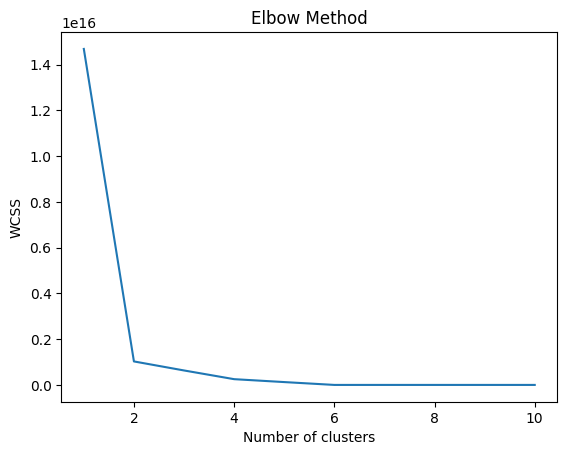

In [13]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

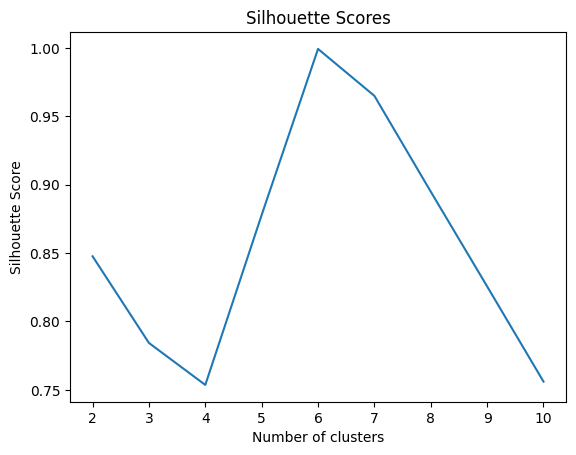

In [14]:
# Silhouette Scores to find the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [17]:

optimal_clusters = 3
# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=500, n_init=10, random_state=42)
kmeans.fit(X)



KMeans(max_iter=500, n_clusters=3, n_init=10, random_state=42)

In [18]:
# Predict the cluster labels
cluster_labels = kmeans.predict(X)

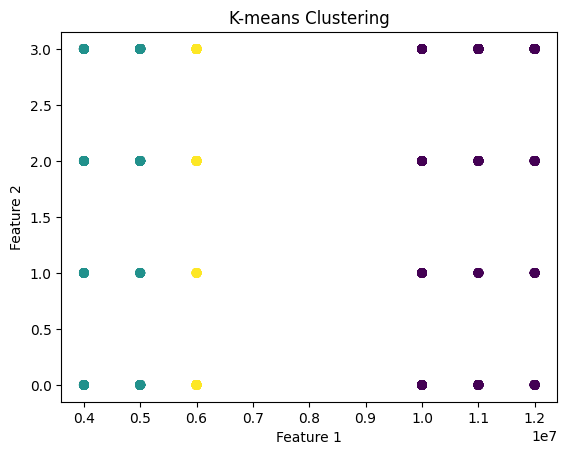

In [19]:
# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

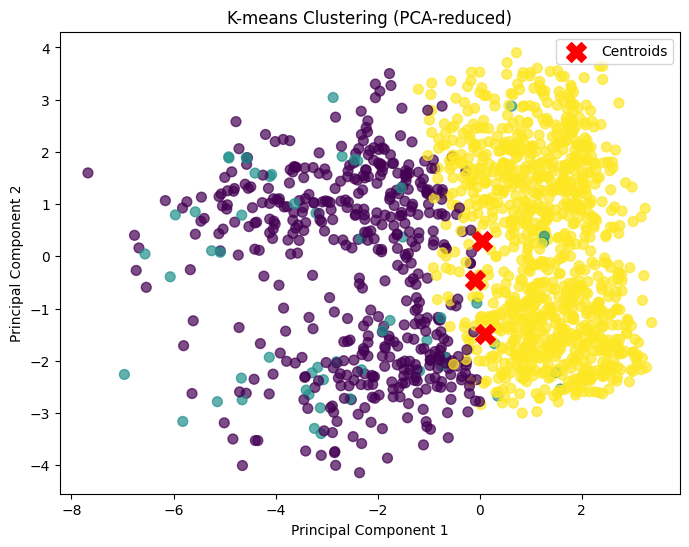

In [38]:
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df1_pca[:, 0], df1_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [26]:
##scaler = StandardScaler()
#df1_scaled = scaler.fit_transform(X)

In [27]:
# #
# wcss = []  # Within-cluster sum of squares
# silhouette_scores = []
# K = range(2, 11)  # Testing for 2 to 10 clusters

# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(df1_scaled)
#     wcss.append(kmeans.inertia_)

In [28]:
# # Silhouette Score
# silhouette_avg = silhouette_score(df1_scaled, kmeans.labels_)
# silhouette_scores.append(silhouette_avg)

In [29]:
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(K, wcss, 'bo-')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.title('Elbow Method')

In [30]:
# # Plot the Silhouette Scores
# plt.subplot(1, 2, 2)
# plt.plot(K, silhouette_scores, 'go-')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Scores')

# plt.show()
# ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

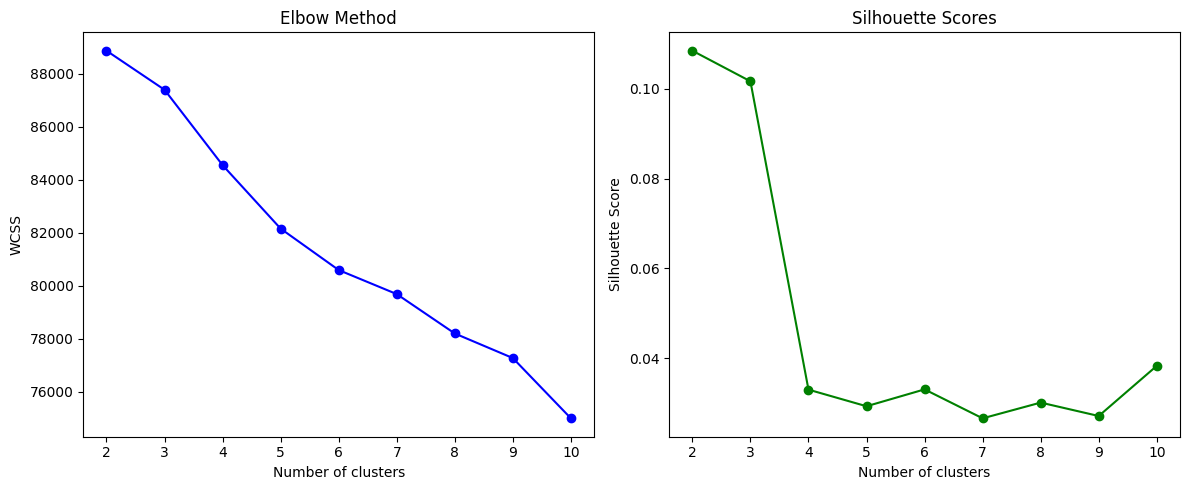

In [31]:
from sklearn.metrics import silhouette_score

# Initialize lists to store WCSS and Silhouette scores
wcss = []
silhouette_scores = []
K = range(2, 11)  # Test for 2 to 10 clusters

# Calculate WCSS and Silhouette scores for each k
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1_scaled)
    wcss.append(kmeans.inertia_)  # WCSS

    # Silhouette Score (only if k > 1)
    if k > 1:
        silhouette_avg = silhouette_score(df1_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Silhouette Scores Plot
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()

In [39]:
# Determine the optimal number of clusters
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we started from k=2
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


In [40]:
# Perform K-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(df1_scaled)

KMeans(n_clusters=2, random_state=42)

In [41]:

# Add cluster labels to the original DataFrame
df1['Cluster'] = kmeans_optimal.labels_

# Display the first few rows of the DataFrame with cluster labels
print(df1.head())

  Study Quarter  Unique Serial Number  Segments-Derived  Weight Final  \
0       Q1 2024               4000009                 0      1.307204   
1       Q1 2024               4000013                 2      1.307204   
2       Q1 2024               4000020                 3      2.215161   
3       Q1 2024               4000023                 3      2.708526   
4       Q1 2024               4000033                 0      1.847973   

   NC Trial  Achievers  Aficionados  Conformists  Conscious  Savvy  ...  \
0         1          1            0            0          0      0  ...   
1         0          0            0            1          0      0  ...   
2         1          0            0            0          0      1  ...   
3         0          0            0            1          0      0  ...   
4         1          0            0            1          0      0  ...   

   FMCD-Enjoy the product satisfaction/sensation  FMCD-Socially acceptable  \
0                               

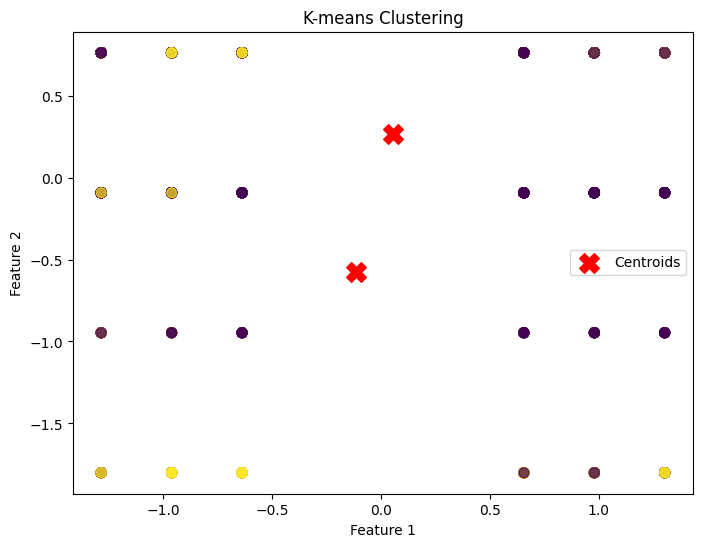

In [42]:
# Assuming df1 has 2 features (columns)
plt.figure(figsize=(8, 6))
plt.scatter(df1_scaled[:, 0], df1_scaled[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

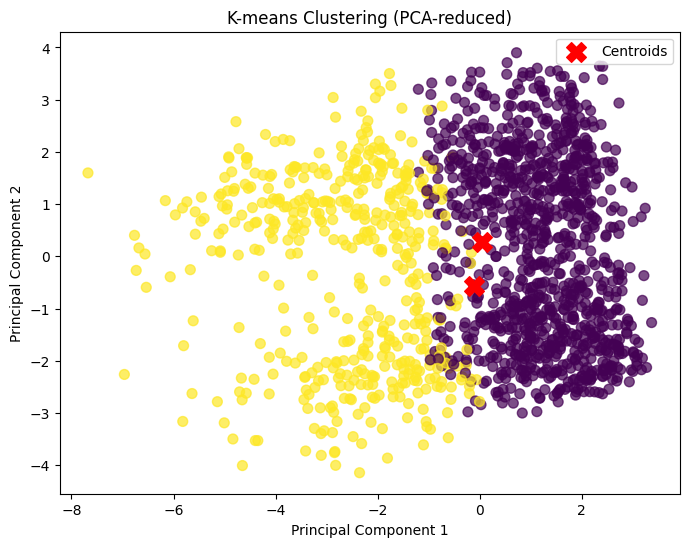

In [43]:
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df1_pca[:, 0], df1_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

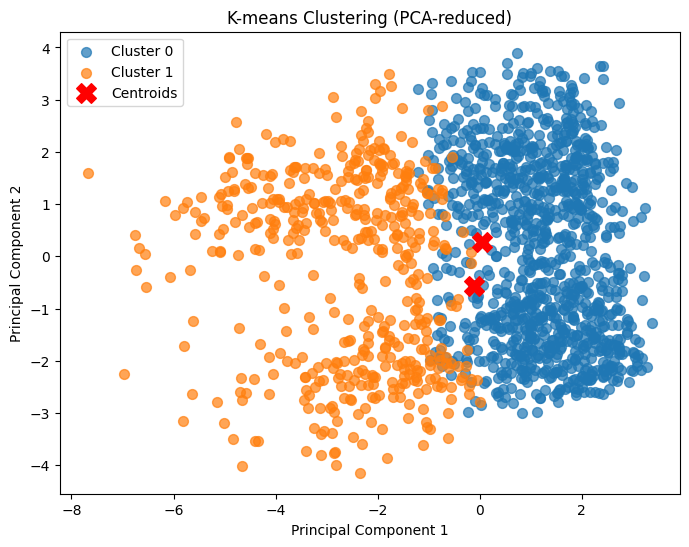

In [44]:
# Plot the clusters with a legend
plt.figure(figsize=(8, 6))

# Create a scatter plot for each cluster
for cluster_label in np.unique(kmeans_optimal.labels_):
    plt.scatter(df1_pca[kmeans_optimal.labels_ == cluster_label, 0],
                df1_pca[kmeans_optimal.labels_ == cluster_label, 1],
                label=f'Cluster {cluster_label}', s=50, alpha=0.7)

# Plot the centroids
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()